# Import libraries 

In [1]:
import pandas as pd
import numpy as np

import os
from datetime import datetime
import pandas_datareader.data as web

# Visualisation
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("seaborn-colorblind")

from pandas_datareader import data as web
from pandas import Series, DataFrame
import datetime
from operator import itemgetter # constructs a callable that assumes an iterable object (e.g. list, tuple, set) as input, and fetches the n-th element out of it.
from datetime import datetime
from datetime import datetime, timedelta

import statsmodels.api as sm

# Deep learning model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
import yfinance as yf
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

# Deep learning from class
from tensorflow.python import tf2
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import *

2022-11-06 10:18:27.387999: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
gbpusd = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2000, 1, 1),
                   end=datetime(2022, 10, 31),
                   )

gbpusd['Currency'] = 'GBP'
gbpusd

,High,Low,Open,Close,Volume,Adj Close,Currency
Date,,,,,,,
2003-12-01,1.727205,1.718390,1.723811,1.718597,0.0,1.718597,GBP
2003-12-02,1.732112,1.717298,1.719010,1.730313,0.0,1.730313,GBP
2003-12-03,1.731812,1.725209,1.730493,1.728101,0.0,1.728101,GBP
2003-12-04,1.728997,1.718302,1.727414,1.720697,0.0,1.720697,GBP
2003-12-05,1.733102,1.719809,1.720608,1.733102,0.0,1.733102,GBP
...,...,...,...,...,...,...,...
2022-10-25,1.162358,1.143419,1.146066,1.146224,0.0,1.146224,GBP
2022-10-26,1.164415,1.155095,1.163345,1.163819,0.0,1.163819,GBP
2022-10-27,1.160012,1.150616,1.156738,1.156604,0.0,1.156604,GBP


In [3]:
eurgbp = web.DataReader("EURGBP=X", "yahoo", start=datetime(2000, 1, 1),
                   end=datetime(2022, 10, 31),
                   )

eurgbp['Currency'] = 'EUR'
eurgbp

,High,Low,Open,Close,Volume,Adj Close,Currency
Date,,,,,,,
2000-01-03,0.62900,0.62030,0.62390,0.62540,0.0,0.62540,EUR
2000-01-04,0.63140,0.62360,0.62530,0.62830,0.0,0.62830,EUR
2000-01-05,0.63300,0.62680,0.62810,0.62840,0.0,0.62840,EUR
2000-01-06,0.63160,0.62420,0.62960,0.62590,0.0,0.62590,EUR
2000-01-07,0.62940,0.62350,0.62650,0.62840,0.0,0.62840,EUR
...,...,...,...,...,...,...,...
2022-10-25,0.86993,0.86460,0.86920,0.86920,0.0,0.86920,EUR
2022-10-26,0.86875,0.86186,0.86708,0.86708,0.0,0.86708,EUR
2022-10-27,0.86494,0.85750,0.86177,0.86177,0.0,0.86177,EUR


In [4]:
gbpjpy = web.DataReader("GBPJPY=X", "yahoo", start=datetime(2000, 1, 1),
                   end=datetime(2022, 10, 31),
                   )

gbpjpy['Currency'] = 'JPY'
gbpjpy

,High,Low,Open,Close,Volume,Adj Close,Currency
Date,,,,,,,
2003-12-01,189.660004,187.740005,189.330002,187.630005,0.0,187.630005,JPY
2003-12-02,188.809998,187.559998,187.669998,188.009995,0.0,188.009995,JPY
2003-12-03,188.240005,186.490005,188.020004,187.089996,0.0,187.089996,JPY
2003-12-04,187.029999,185.899994,187.029999,186.220001,0.0,186.220001,JPY
2003-12-05,186.740005,185.830002,186.190002,185.880005,0.0,185.880005,JPY
...,...,...,...,...,...,...,...
2022-10-25,170.582993,169.356995,169.598999,169.598999,0.0,169.598999,JPY
2022-10-26,170.031006,168.759995,170.052002,170.052002,0.0,170.052002,JPY
2022-10-27,171.044998,168.899994,169.132004,169.132004,0.0,169.132004,JPY


In [5]:
gbp_brexit = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2015, 1, 1),
                   end=datetime(2022, 10, 31),
                   )


gbp_brexit

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,1.558094,1.558094,1.558094,1.558094,0.0,1.558094
2015-01-02,1.558458,1.538746,1.558021,1.557972,0.0,1.557972
2015-01-05,1.532004,1.520612,1.528608,1.528491,0.0,1.528491
2015-01-06,1.527370,1.515795,1.525832,1.525832,0.0,1.525832
2015-01-07,1.515611,1.506796,1.513638,1.513798,0.0,1.513798
...,...,...,...,...,...,...
2022-10-25,1.162358,1.143419,1.146066,1.146224,0.0,1.146224
2022-10-26,1.164415,1.155095,1.163345,1.163819,0.0,1.163819
2022-10-27,1.160012,1.150616,1.156738,1.156604,0.0,1.156604


In [6]:
gbp_brexit.to_csv('gbp_brexit_from2015.csv')

# Model 1: Long Short-Term Memory ( LSTM ) 

In [8]:
gbpnew = web.DataReader("GBPUSD=X", "yahoo", start=datetime(2000, 1, 1),
                   end=datetime(2022, 10, 31),
                   )

In [9]:
gbpnew

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-01,1.727205,1.718390,1.723811,1.718597,0.0,1.718597
2003-12-02,1.732112,1.717298,1.719010,1.730313,0.0,1.730313
2003-12-03,1.731812,1.725209,1.730493,1.728101,0.0,1.728101
2003-12-04,1.728997,1.718302,1.727414,1.720697,0.0,1.720697
2003-12-05,1.733102,1.719809,1.720608,1.733102,0.0,1.733102
...,...,...,...,...,...,...
2022-10-25,1.162358,1.143419,1.146066,1.146224,0.0,1.146224
2022-10-26,1.164415,1.155095,1.163345,1.163819,0.0,1.163819
2022-10-27,1.160012,1.150616,1.156738,1.156604,0.0,1.156604


In [10]:
close_prices = gbpnew['Close'] # using data between 2000 Jan - 2022 Oct
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8) # rounds a number UP to the nearest integer 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1)) # reshape the scaled data into a 2D array

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) # following a random 60 days data window
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train) 
# As TensorFlow only accepts np array as data format when training a neural network model, I am converting the feature data

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 
# Reshape again the x_train and y_train into a 3D array as part of the requirement to train a LSTM model

In [11]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
### Setting up the machine learning network arhitecture

In [12]:
%%time
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1))) # return=True so the output of the layer will be another sequence of the same length
model.add(layers.LSTM(100, return_sequences=False)) # reture=false to only return the last output in the output sequence
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

2022-11-06 10:19:51.279696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
CPU times: user 767 ms, sys: 34.2 ms, total: 801 ms
Wall time: 871 ms


In [13]:
%%time
from tensorflow.keras.optimizers import *

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, metrics=['mean_squared_error'], loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

#model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/3
3876/3876 [==============================] - 161s 40ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 2/3
3876/3876 [==============================] - 158s 41ms/step - loss: 4.2407e-04 - mean_squared_error: 4.2407e-04
Epoch 3/3
3876/3876 [==============================] - 144s 37ms/step - loss: 2.8628e-04 - mean_squared_error: 2.8628e-04
CPU times: user 14min 20s, sys: 1min 46s, total: 16min 7s
Wall time: 7min 42s


In [14]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

31/31 [==============================] - 2s 40ms/step


0.0007445401534801576

In [ ]:
# Model Evaluation: 

# RMSE of 0.00075 could be considered very low but considering that the analsis is being carried out on the 
# financial data, the size of investent to make a high profit would be big, hence such rmse is still not low 
# enough to base investments on it just yet.

In [ ]:
# LSME Model: 

# RMSE is one of the most popular measures to estimate the accuracy of forecasting model’s predicted values 
# versus the actual or observed values while training the (regression models or) time series models.

# The smaller the RMSE the more accurate the prediction is. While my result for LSTM deep learning machine
# learning is quite low, I would evaluate it as a well functioning initial model which could be improved 
# with further experiments on the layer / dense / batch or epoch size. 

/var/folders/0j/8qpr4dtj39x29g5tw9dvh26m0000gn/T/ipykernel_13644/595970932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


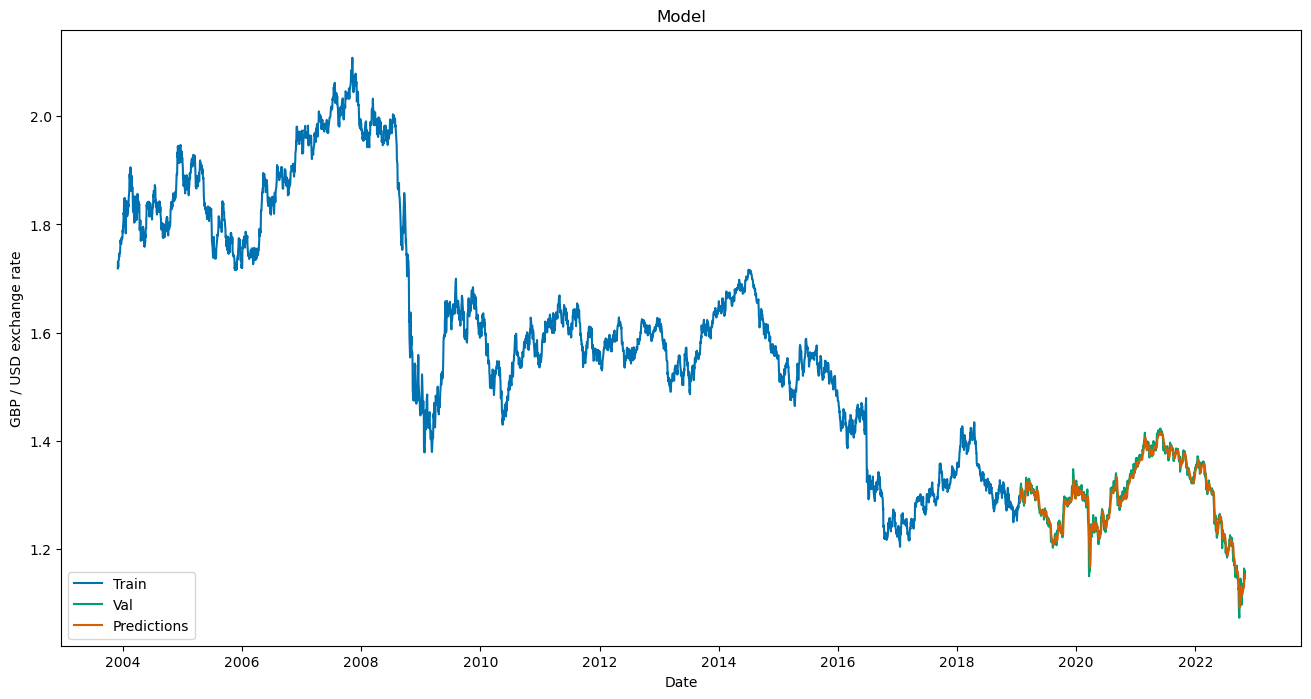

In [15]:
data = gbpnew.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('GBP / USD exchange rate')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()

# LSTM Model - Version 2

In [16]:
def version2(df):
    close_prices = df['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8) 
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    train_data = scaled_data[0: training_data_len, :]
    x_train = []
    y_train = []
    
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]
    
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
model2 = keras.Sequential()
model2.add(layers.LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model2.add(Dropout(0.2)) # Dropout is a technique where randomly selected neurons are ignored during training. 
model2.add(layers.LSTM(units=50,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(layers.LSTM(units=50,return_sequences=True))
model2.add(Dropout(0.2))
model2.add(layers.LSTM(units=50))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)               

In [ ]:
model2.save('lsmt_analysis.h5') # pickling 

In [ ]:
new_model = keras.models.load_model('lsmt_analysis.h5') # unpickling

In [18]:
%%time

optimizer = Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, metrics=['mean_squared_error'], loss='mean_squared_error')
#model2.compile(optimizer='adam',loss='mean_squared_error')

model2.fit(x_train,y_train,epochs=100, # Epoch is a hyperparameter that defines the number times that the learning 
                                      # algorithm will work through the entire training dataset.
          batch_size=32) # Batch size is a hyperparameter that defines the number of samples to work through 
                         # before updating the internal model parameters.
                         # A sample is a single row of the data, may also be called an instance, an observation, 
                         # an input vector, or a feature vector.

Epoch 1/100
122/122 [==============================] - 30s 150ms/step - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 2/100
122/122 [==============================] - 16s 134ms/step - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 3/100
122/122 [==============================] - 16s 131ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 4/100
122/122 [==============================] - 17s 135ms/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 5/100
122/122 [==============================] - 18s 151ms/step - loss: 0.0044 - mean_squared_error: 0.0044
Epoch 6/100
122/122 [==============================] - 23s 188ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 7/100
122/122 [==============================] - 18s 146ms/step - loss: 0.0043 - mean_squared_error: 0.0043
Epoch 8/100
122/122 [==============================] - 20s 162ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 9/100
122/122 [==============================] - 21s 175ms/step - loss: 0.0039 - m

122/122 [==============================] - 29s 236ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 73/100
122/122 [==============================] - 29s 236ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 74/100
122/122 [==============================] - 27s 219ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 75/100
122/122 [==============================] - 26s 209ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 76/100
122/122 [==============================] - 25s 203ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 77/100
122/122 [==============================] - 26s 210ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 78/100
122/122 [==============================] - 25s 207ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 79/100
122/122 [==============================] - 25s 205ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 80/100
122/122 [==============================] - 28s 231ms/step - loss: 0.0016 - mean_

In [24]:
predictions2 = model2.predict(x_test)
predictions2 = scaler.inverse_transform(predictions2)
rmse = np.sqrt(np.mean(predictions2 - y_test)**2)
print('rmse with 100 epochs', rmse)

31/31 [==============================] - 1s 41ms/step
rmse with 100 epochs 0.009320063198485025


In [ ]:
# The batch_size and epoch size did not perform as good as it did in the 1st Model.

In [ ]:
# Brief explanation about structure of LSTM Model:

# Think of a for-loop over the number of epochs where each loop proceeds over the training dataset. 
# Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch 
# has the specified “batch size” number of samples.

In [ ]:
# The batch size is a number of samples processed before the model is updated.

# The number of epochs is the number of complete passes through the training dataset.

# LSTM Model - Version 3

In [20]:
def verion3(df):
    close_prices = df['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    train_data = scaled_data[0: training_data_len, :]
    x_train = []
    y_train = []
    
    
    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]
    
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
model3 = Sequential()
model3.add(layers.LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model3.add(Dropout(0.2)) # Dropout is a technique where randomly selected neurons are ignored during training. 
model3.add(layers.LSTM(units=50,return_sequences=True))
model3.add(Dropout(0.2))
model3.add(layers.LSTM(units=50,return_sequences=True))
model3.add(Dropout(0.2))
model3.add(layers.LSTM(units=50))
model3.add(Dropout(0.2))
model3.add(Dense(units=1))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 50)               

In [22]:
%%time
model3.compile(optimizer='adam',loss='mean_squared_error')
model3.fit(x_train,y_train,epochs=50, # Epoch is a hyperparameter that defines the number times that the learning 
                                      # algorithm will work through the entire training dataset.
          batch_size=20) # Batch size is a hyperparameter that defines the number of samples to work through 
                         # before updating the internal model parameters.
                         # A sample is a single row of the data, may also be called an instance, an observation, 
                         # an input vector, or a feature vector.

Epoch 1/50
194/194 [==============================] - 66s 227ms/step - loss: 0.0116
Epoch 2/50
194/194 [==============================] - 41s 211ms/step - loss: 0.0038
Epoch 3/50
194/194 [==============================] - 43s 222ms/step - loss: 0.0033
Epoch 4/50
194/194 [==============================] - 37s 193ms/step - loss: 0.0029
Epoch 5/50
194/194 [==============================] - 42s 215ms/step - loss: 0.0026
Epoch 6/50
194/194 [==============================] - 43s 219ms/step - loss: 0.0025
Epoch 7/50
194/194 [==============================] - 41s 209ms/step - loss: 0.0024
Epoch 8/50
194/194 [==============================] - 44s 225ms/step - loss: 0.0021
Epoch 9/50
194/194 [==============================] - 45s 233ms/step - loss: 0.0020
Epoch 10/50
194/194 [==============================] - 63s 327ms/step - loss: 0.0017
Epoch 11/50
194/194 [==============================] - 47s 241ms/step - loss: 0.0016
Epoch 12/50
194/194 [==============================] - 52s 268ms/step - lo

In [ ]:
#new_model = keras.models.load_model('lsmt_analysis.h5') # unpickling

In [23]:
predictions3 = model3.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)
rmse = np.sqrt(np.mean(predictions3 - y_test)**2)
print('rmse after batch_size 20, 50 epochs', rmse)

31/31 [==============================] - 5s 37ms/step
rmse after batch_size 20, 50 epochs 0.005946119505215466


In [ ]:
# Not well predicting batch and epoch size, higher rmse as with previous models.

# LSTM Model - Version 4

In [25]:
def verion11(df):
    close_prices = df['Close']
    values = close_prices.values
    training_data_len = math.ceil(len(values)* 0.8)
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(values.reshape(-1,1))
    train_data = scaled_data[0: training_data_len, :]
    x_train = []
    y_train = []
    
    
    for i in range(60, len(train_data)): # checking the last 60 days
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    test_data = scaled_data[training_data_len-60: , : ]
    x_test = []
    y_test = values[training_data_len:]
    
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
%%time
model4 = keras.Sequential()
model4.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1))) # return=True so the output of the layer will be another sequence of the same length
model4.add(layers.LSTM(100, return_sequences=False)) # reture=false to only return the last output in the output sequence
model4.add(layers.Dense(25))
model4.add(layers.Dense(1))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_11 (LSTM)              (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________
CPU times: user 990 ms, sys: 70.3 ms, total: 1.06 s
Wall time: 1.21 s


In [27]:
%%time
from tensorflow.keras.optimizers import *
optimizer = Adam(learning_rate=0.0001)
model4.compile(optimizer=optimizer, metrics=['mean_squared_error'], loss='mean_squared_error')
model4.fit(x_train, y_train, batch_size= 30, epochs=20)

# batch_size=50, epoch=5                    : rmse = 0.002822455651641256
# batch_size=50, epoch=10                   : rmse = 0.0028094893675733317
# batch_size 50, epoch=20                   : rmse = 0.0015874015714969422 
# batch_size 30, epoch=20                   : rmse = 0.0004171129403254993 winner
# batch_size 30, epcoh=40                   : rmse = 0.0033316139287162773
# batch_size 80, epoch=20                   : rmse = 0.0022804378129215957
# batch_size 30, epoch=10                   : rmse = 0.0032200169345005846

# batch_size 20, epoch=50                   : rmse = 0.005946119505215466
# batch_size 80, epoch=20 worst             : rmse = 0.005871830612330082

Epoch 1/20
130/130 [==============================] - 26s 151ms/step - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 2/20
130/130 [==============================] - 21s 164ms/step - loss: 7.7907e-04 - mean_squared_error: 7.7907e-04
Epoch 3/20
130/130 [==============================] - 17s 132ms/step - loss: 6.5472e-04 - mean_squared_error: 6.5472e-04
Epoch 4/20
130/130 [==============================] - 16s 126ms/step - loss: 6.3491e-04 - mean_squared_error: 6.3491e-04
Epoch 5/20
130/130 [==============================] - 21s 161ms/step - loss: 6.1831e-04 - mean_squared_error: 6.1831e-04
Epoch 6/20
130/130 [==============================] - 17s 134ms/step - loss: 6.1107e-04 - mean_squared_error: 6.1107e-04
Epoch 7/20
130/130 [==============================] - 17s 130ms/step - loss: 5.6483e-04 - mean_squared_error: 5.6483e-04
Epoch 8/20
130/130 [==============================] - 19s 146ms/step - loss: 5.3757e-04 - mean_squared_error: 5.3757e-04
Epoch 9/20
130/130 [====================

In [28]:
predictions4 = model4.predict(x_test)
predictions4 = scaler.inverse_transform(predictions4)
rmse = np.sqrt(np.mean(predictions4 - y_test)**2)
rmse

31/31 [==============================] - 3s 39ms/step


0.00214803969956995

/var/folders/0j/8qpr4dtj39x29g5tw9dvh26m0000gn/T/ipykernel_13644/1572475505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions4


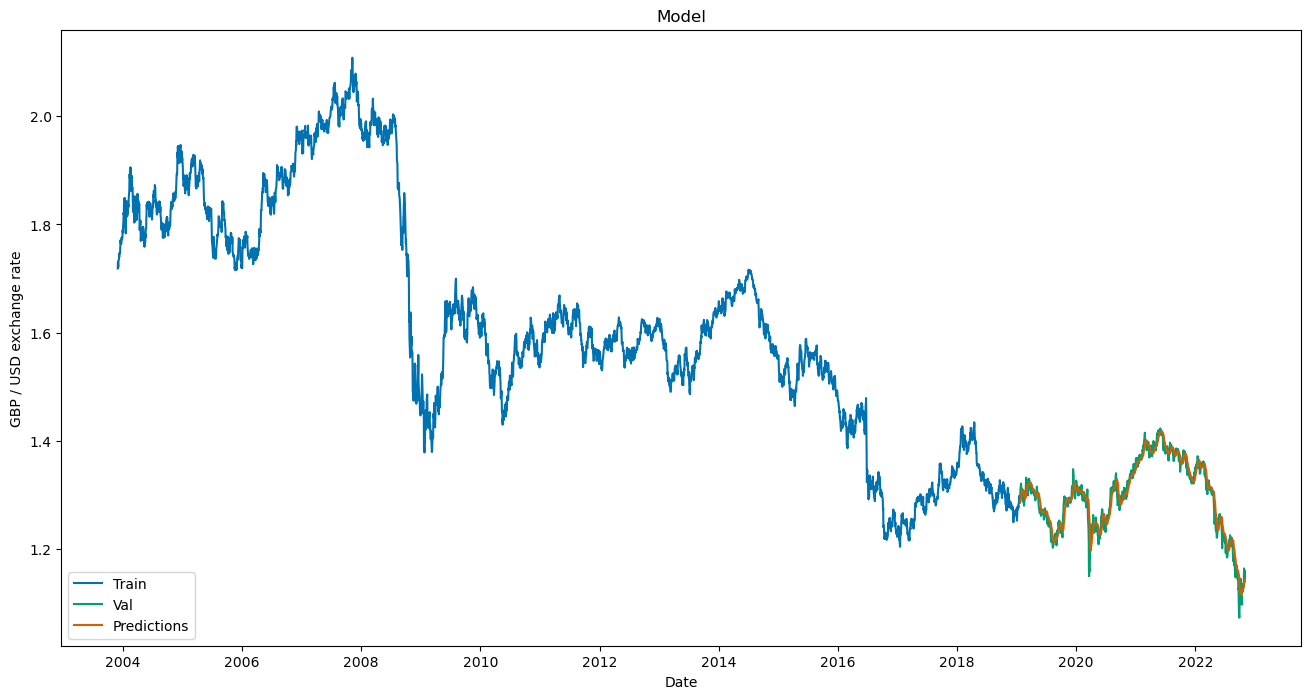

In [29]:
data = gbpnew.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions4
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('GBP / USD exchange rate')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()

In [ ]:
The LSTM Models seem to give more accurate predictions than the ARIMA Models did. In they current form, as part
of an education project, the LSTM Models give good chance to work on forex financial data. Later on, by 
expanding the analysis and testing the model on different exchange pairs the model could improve and give more 
accurate predictions. The analysis could also be extended to Prophet model.